In [47]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [40]:
# Importing the dataset
df = pd.read_excel (r'C:\Users\mjanardanan\Desktop\Clustering\Custom SQL Query_sat.xlsx') 
df.head(10)

,BoardDescription,LOS,EntBin,EntDOW,OvNt,ExtBin,Biz/Lei,by LOS,Ent Before,BehaviorGroup,...,LOS (Day),LOS (group),LocationID,Number of Records,Online,RateDescription,Rev,timein,timeout,losn
0,Main Board,13,23,Saturday,1,11,Lei,24,23,Sat/Lei/13-24/Peak,...,1Day,13-24,51684,1,other,Default,70.0,2018-09-22 23:08:19,2018-09-23 11:28:23,17
1,Main Board,13,23,Saturday,1,11,Lei,24,23,Sat/Lei/13-24/Peak,...,1Day,13-24,51684,1,other,Default,70.0,2018-05-12 23:04:12,2018-05-13 11:24:40,17
2,NaN,13,23,Saturday,1,12,Lei,24,23,Sat/Lei/13-24/Peak,...,1Day,13-24,51410,1,PWIZ,ParkWhiz,55.0,2018-01-06 23:25:00,2018-01-07 12:36:43,17
3,6-24 Hrs Hotel,13,23,Saturday,1,11,Lei,24,23,Sat/Lei/13-24/Peak,...,1Day,13-24,91765,1,other,200 Park Avenue,80.0,2019-04-27 23:16:18,2019-04-28 11:49:34,17
4,24 hrs,13,23,Saturday,1,11,Lei,24,23,Sat/Lei/13-24/Peak,...,1Day,13-24,64232,1,other,Roosevelt,44.0,2019-02-23 23:17:27,2019-02-24 11:48:45,17
5,24 Hrs,13,23,Saturday,1,11,Lei,24,23,Sat/Lei/13-24/Peak,...,1Day,13-24,64232,1,other,Grand Hyatt Hotel,18.0,2019-06-08 23:22:26,2019-06-09 11:38:13,17
6,24 Hrs,13,23,Saturday,1,11,Lei,24,23,Sat/Lei/13-24/Peak,...,1Day,13-24,64232,1,other,Grand Hyatt Hotel,18.0,2019-04-06 23:13:45,2019-04-07 11:30:22,17
7,The Edge Hotel,13,23,Saturday,1,12,Lei,24,23,Sat/Lei/13-24/Peak,...,1Day,13-24,61603,1,other,The Edge Hotel,45.0,2018-10-27 23:39:55,2018-10-28 12:31:10,17
8,24 hrs,13,23,Saturday,1,12,Lei,24,23,Sat/Lei/13-24/Peak,...,1Day,13-24,51716,1,other,Westin Hotel,75.0,2019-03-16 23:20:35,2019-03-17 12:05:17,17
9,London Hotel,13,23,Saturday,1,11,Lei,24,23,Sat/Lei/13-24/Peak,...,1Day,13-24,51684,1,other,London Hotel,30.0,2018-06-30 23:11:02,2018-07-01 11:24:59,17


In [51]:
#f1 = df['Cnt'].values
f2 = df['EntBin'].values
f3 = df['losn'].values
#f4 = df['Cnt'].values
X = np.array(list(zip(f2, f3)))
X

array([[ 23,  17],
       [ 23,  17],
       [ 23,  17],
       ...,
       [  0, 104],
       [  0, 104],
       [  0, 104]], dtype=int64)

In [54]:
mms = MinMaxScaler()
mms.fit(X)
data_transformed = mms.transform(X)

C:\Users\mjanardanan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [52]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

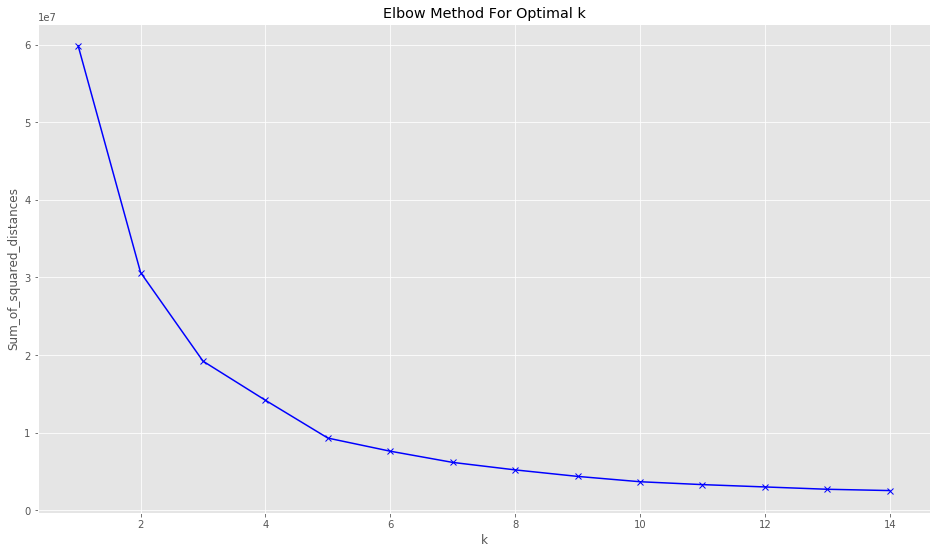

In [53]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [55]:


# Number of clusters
kmeans = KMeans(n_clusters=10)
# Fitting the input data
kmeans = kmeans.fit(data_transformed)
# Getting the cluster labels
labels = kmeans.predict(data_transformed)
# Centroid values
centroids = kmeans.cluster_centers_
#print(labels)

In [35]:
print(centroids)

[[6.57097872e+03 1.52340426e+01 1.50212766e+01]
 [1.90647000e+05 7.50000000e+00 8.00000000e+00]
 [3.53042000e+04 1.03000000e+01 5.00000000e+00]
 [1.93404063e+04 1.34687500e+01 7.62500000e+00]
 [1.13992810e+03 1.00130719e+01 3.45098039e+01]
 [1.20833000e+05 9.00000000e+00 8.00000000e+00]
 [4.83420000e+04 1.05000000e+01 3.91666667e+00]
 [1.53810000e+05 6.00000000e+00 8.00000000e+00]
 [1.21017692e+04 1.28205128e+01 1.03076923e+01]
 [2.70735333e+04 1.00000000e+01 3.66666667e+00]]


In [56]:
np.savetxt('fullsatscaled.txt', labels, fmt='%.f')